In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd 

C:\Users\Admin


In [3]:
cd Desktop/

C:\Users\Admin\Desktop


In [4]:
cd Lekan/

C:\Users\Admin\Desktop\Lekan


In [5]:
cd Tech/

C:\Users\Admin\Desktop\Lekan\Tech


In [6]:
cd diabetes.txt

[WinError 267] The directory name is invalid: 'diabetes.txt'
C:\Users\Admin\Desktop\Lekan\Tech


In [7]:
diabetes=pd.read_csv('diabetes.txt')

In [8]:
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [9]:
features=['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label='Diabetic'
x,y=diabetes[features].values,diabetes[label].values

for n in range(0,4):
    print('Patient',str(n+1), '\n Features:',list(x[n]), '\n Label:',y[n])

Patient 1 
 Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
 Label: 0
Patient 2 
 Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
 Label: 0
Patient 3 
 Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
 Label: 0
Patient 4 
 Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
 Label: 1


####  Comparing the features distribution for each label values


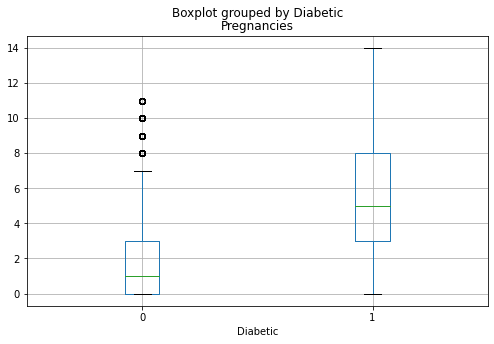

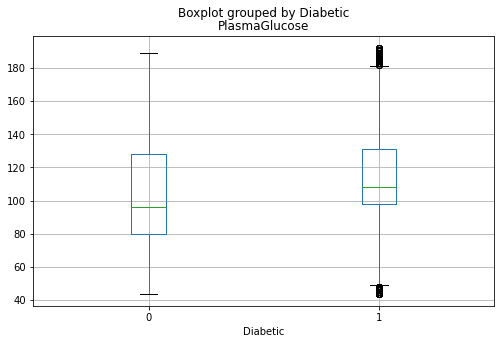

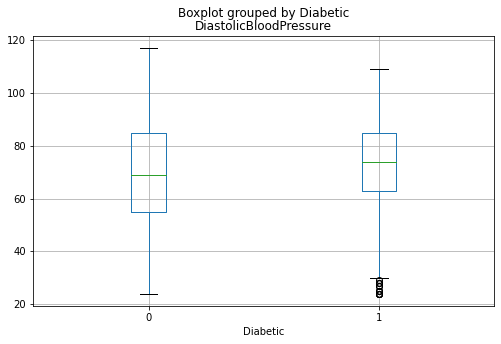

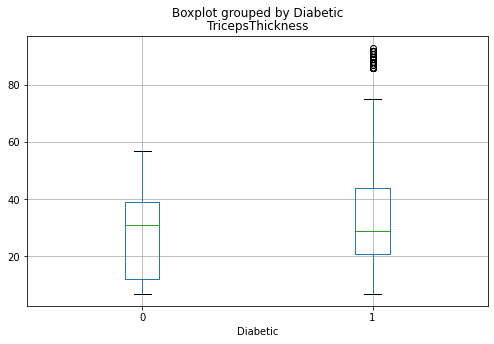

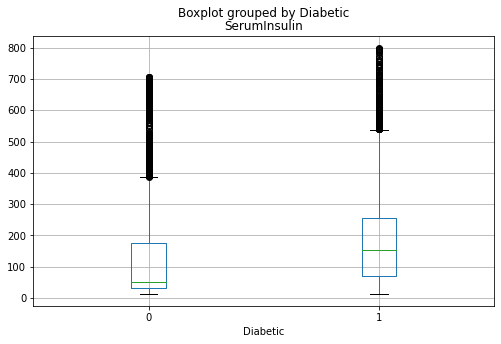

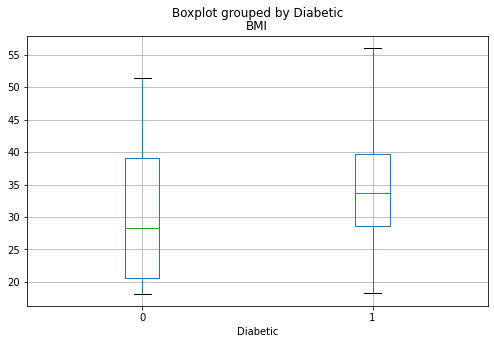

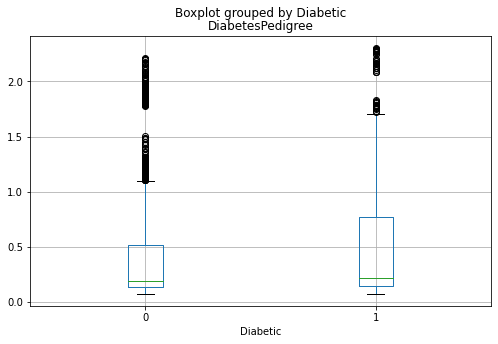

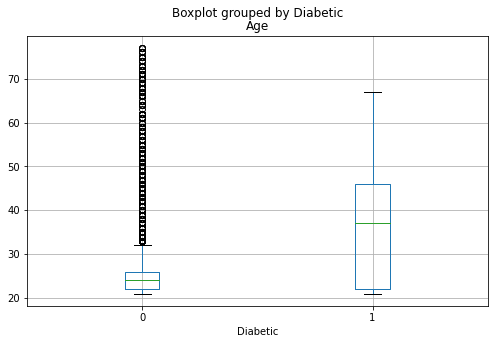

In [10]:
for col in features:
    diabetes.boxplot(column=col,by=label,figsize=(8,5))

In [11]:
#traning and testing the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

print('Traning Values:',x_train.shape[0],'\nTesting Values:',x_test.shape[0])

Traning Values: 10500 
Testing Values: 4500


####  Train & Evaulate a Binary Classificatiton Model

In [12]:
from sklearn.linear_model import LogisticRegression

#set a regularization rate to counteract any bias in the sample
reg=0.01

#Training a logistic Reg model on the training set
model=LogisticRegression(C=1/reg,solver='liblinear').fit(x_train,y_train)
model

LogisticRegression(C=100.0, solver='liblinear')

In [13]:
# get the predicted values
pred=model.predict(x_test)
print('Actual. values:',y_test[:10],'\nPredict values:',pred[:10])

Actual. values: [0 0 1 1 1 1 0 0 1 0] 
Predict values: [0 0 0 1 1 0 0 0 1 0]


In [14]:
from sklearn.metrics import  accuracy_score
print('Accuracy:',accuracy_score(y_test,pred))

Accuracy: 0.7888888888888889


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



In [16]:
from sklearn.metrics import precision_score,recall_score
print('Overall Precision:',precision_score(y_test,pred))
print('Overall Recall:',recall_score(y_test,pred))

Overall Precision: 0.7231012658227848
Overall Recall: 0.6036988110964333


In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[2636,  350],
       [ 600,  914]], dtype=int64)

######  this model is too poor because about 600 pateint has diabetes which the model didn't detect and about 340 didn't have but the model predicted that have therefore resources will be wasted on them

### to determine the predicted probability for 0-1

In [18]:
y_score=model.predict_proba(x_test)
print(y_score)

[[0.81673764 0.18326236]
 [0.96318178 0.03681822]
 [0.80901254 0.19098746]
 ...
 [0.60687742 0.39312258]
 [0.10607627 0.89392373]
 [0.63833786 0.36166214]]


######  the best way to improve our model is to evaluate the classifier to examin the TP and FP for a range of possible thresholds
note that chaning the threshold will affect the whole model

#####  Creating a ROC  chart Received Operation Characteristics 

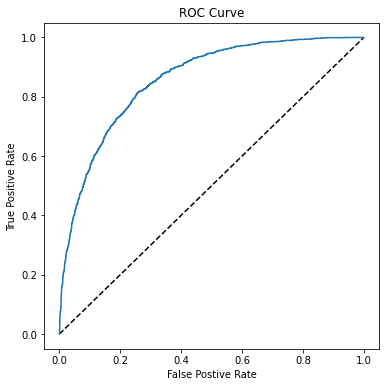

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

#calu ROC curve
fpr,tpr,thresholds=roc_curve(y_test,y_score[:,1])

#plot ROC curve
fig=plt.figure(figsize=(6,6))

#plot the diagonal 50% line
plt.plot([0,1],[0,1],'k--')

#plot FPR and TPR achieved by thr model
plt.plot(fpr,tpr)
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');


######  a perfect model would have a curve that goes straight up the left side and striagh across the top

#### AUC Area Under the Curve quntifies the overall performance of the model

In [20]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,y_score[:,1])
print('AUC:',auc)

AUC: 0.8568296701206246


####  Perform Preprocessing in a pipeline

In [21]:
#Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression

#Define Preprocessing for numeric columns(normalize them so they're on the same scale)
num_features=[0,1,2,3,4,5,6]
num_transformer=Pipeline(steps=[('scaler',StandardScaler())])

#Define preprocessing for categorical features(encode the age column)
categ_features=[7]
categ_transformer=Pipeline(steps=[('onhot',OneHotEncoder(handle_unknown='ignore'))])

#combine preprocessing steps
preprocessor=ColumnTransformer(transformers=[('num',num_transformer,num_features),
                                             ('cat',categ_transformer,categ_features)])

#create preprocessing and training pipeline
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                  ('logregressor',LogisticRegression(C=1/reg,solver='liblinear'))])

#fit the pipeline to train a logistic regression model on the training set
model=pipeline.fit(x_train,(y_train))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onhot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])

### compare the pipline with previous model

Confusion matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy Score: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202442751333612


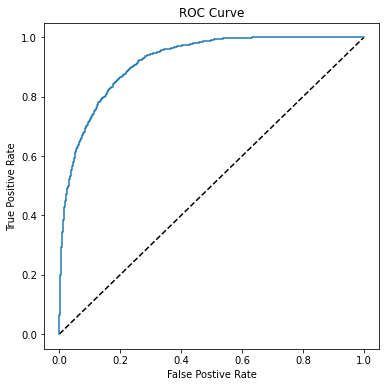

In [22]:
#get prediction fromtest data
pred=model.predict(x_test)
y_score=model.predict_proba(x_test)
cm=confusion_matrix(y_test,pred)

#get evaluation metrics
print('Confusion matrix:\n',cm,'\n')
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Overall Precision:',precision_score(y_test,pred))
print('Overall Recall:',recall_score(y_test,pred))
auc=roc_auc_score(y_test,y_score[:,1])
print('AUC:',auc)


#calu ROC curve
fpr,tpr,thresholds=roc_curve(y_test,y_score[:,1])

#plot ROC curve
fig=plt.figure(figsize=(6,6))

#plot the diagonal 50% line
plt.plot([0,1],[0,1],'k--')

#plot FPR and TPR achieved by thr model
plt.plot(fpr,tpr)
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');

#### Using another algorithm; ensmble: random forest classifer

In [23]:
from sklearn.ensemble import RandomForestClassifier

pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                        ('%logregressor',RandomForestClassifier(n_estimators=100))])

model=pipeline.fit(x_train,(y_train))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onhot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('%logregressor', RandomForestClassifier())])

Confusion matrix:
 [[2855  131]
 [ 176 1338]] 

Accuracy Score: 0.9317777777777778
Overall Precision: 0.9108236895847516
Overall Recall: 0.8837516512549538
AUC: 0.9822900970712289


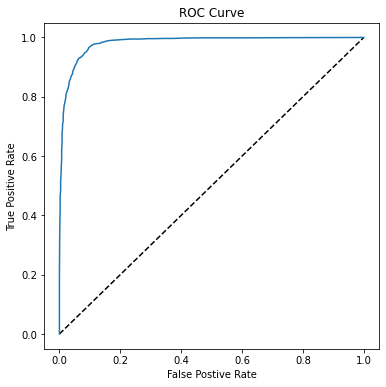

In [24]:
#get prediction fromtest data
pred=model.predict(x_test)
y_score=model.predict_proba(x_test)
cm=confusion_matrix(y_test,pred)

#get evaluation metrics
print('Confusion matrix:\n',cm,'\n')
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Overall Precision:',precision_score(y_test,pred))
print('Overall Recall:',recall_score(y_test,pred))
auc=roc_auc_score(y_test,y_score[:,1])
print('AUC:',auc)


#calu ROC curve
fpr,tpr,thresholds=roc_curve(y_test,y_score[:,1])

#plot ROC curve
fig=plt.figure(figsize=(6,6))

#plot the diagonal 50% line
plt.plot([0,1],[0,1],'k--')

#plot FPR and TPR achieved by thr model
plt.plot(fpr,tpr)
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');

####  Save the model for further use

In [25]:
import joblib

#save it as a pickle file
filename='./diabetes_model.pkl'
joblib.dump(model,filename)

['./diabetes_model.pkl']

#####  using the model to predict new observation

In [26]:
model=joblib.load(filename)

#predict a new patient with the following obsevation
x_new=np.array([[2,180,74,24,21,23.90917,1.488,22]])
print('New sample:',list(x_new[0]))

#get prediction
pred=model.predict(x_new)


print('Preicted class:',pred[0])
if pred==1:
    print('Diabetes Patient')
else:
    print('Non-Disbetes')

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.90917, 1.488, 22.0]
Preicted class: 1
Diabetes Patient


In [27]:
label

'Diabetic'